<a href="https://colab.research.google.com/github/smartNitish/Quantum-Computing/blob/main/QuantumImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pylatexenc
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=35655c016f89feb748a090c37db925767af14a221356b30a99bd3a0652492c5c
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.9 MB/s eta 0:00:00


In [ ]:
from qiskit import*
import numpy as np

In [ ]:
p1 = 0
p2 = np.pi/6
p3 = np.pi/3
p4 = np.pi/2

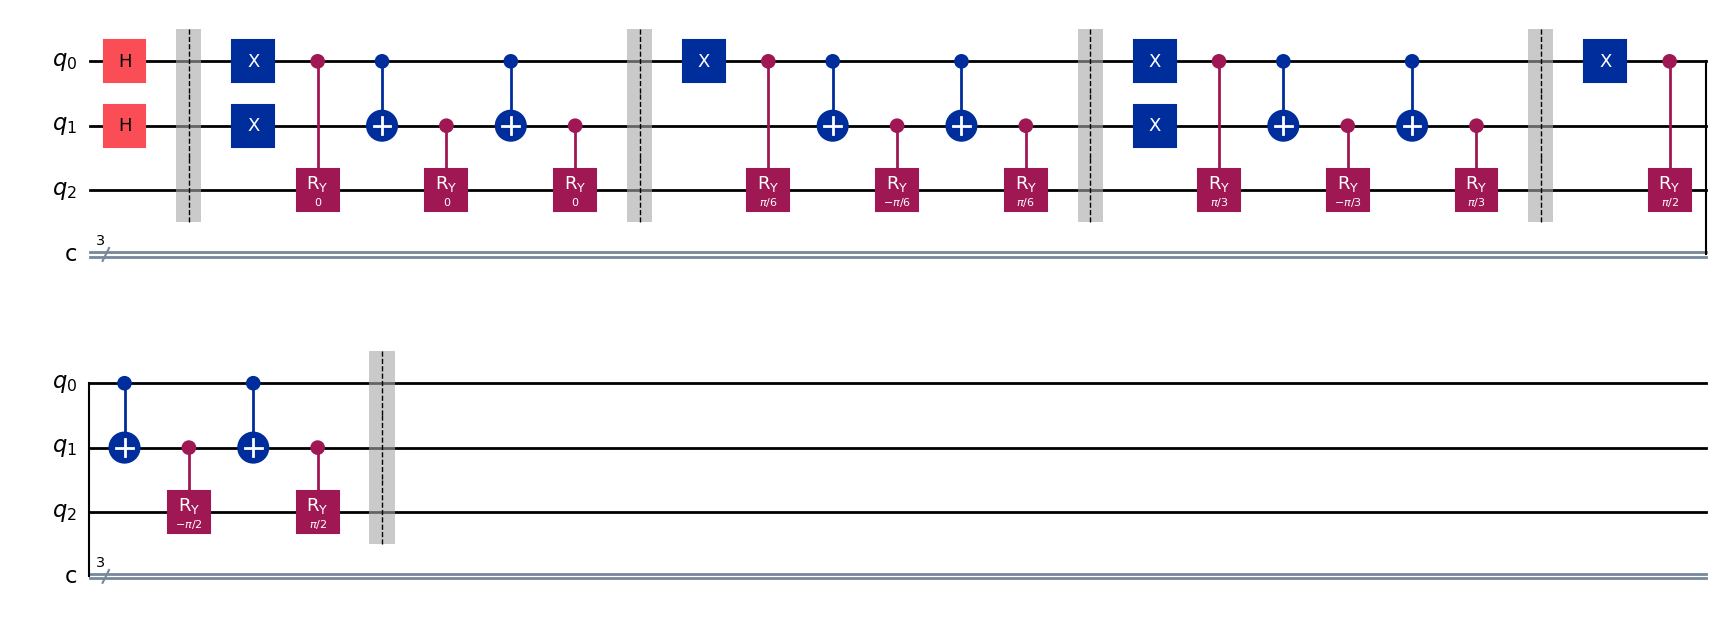

In [ ]:
qc = QuantumCircuit(3,3)
qc.h(0)
qc.h(1)
qc.barrier()

qc.x(0)
qc.x(1)
qc.cry(p1,0,2)
qc.cx(0,1)
qc.cry(-p1,1,2)
qc.cx(0,1)
qc.cry(p1,1,2)
qc.barrier()

qc.x(0)
qc.cry(p2,0,2)
qc.cx(0,1)
qc.cry(-p2,1,2)
qc.cx(0,1)
qc.cry(p2,1,2)
qc.barrier()

qc.x(0)
qc.x(1)
qc.cry(p3,0,2)
qc.cx(0,1)
qc.cry(-p3,1,2)
qc.cx(0,1)
qc.cry(p3,1,2)
qc.barrier()

qc.x(0)
qc.cry(p4,0,2)
qc.cx(0,1)
qc.cry(-p4,1,2)
qc.cx(0,1)
qc.cry(p4,1,2)
qc.barrier()


qc.draw(output='mpl')

In [ ]:
from qiskit.quantum_info import Statevector,Operator

In [ ]:
st = Statevector(qc)
st.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
unitary = Operator(qc)
unitary.draw('latex')


<IPython.core.display.Latex object>

In [ ]:
# from qiskit import Aer

simulator = Aer.get_backend('qasm_simulator')
# Add measurements to the quantum circuit
qc.measure_all() # This adds measurements to all qubits in the circuit
job = simulator.run(qc, shots=20000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

{'001 001 000': 3711, '110 110 000': 3763, '101 101 000': 1240, '010 010 000': 1266, '111 111 000': 5119, '000 000 000': 4901}


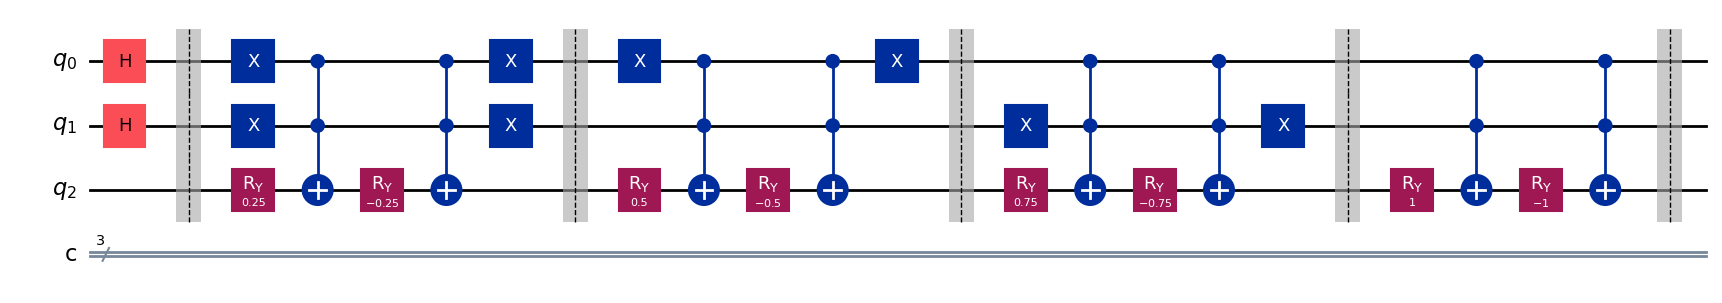

In [ ]:
# qc1 = QuantumCircuit(3,3)
# qc1.h(0)
# qc1.h(1)
# qc1.barrier()
# qc1.x(0)
# qc1.x(1)
# qc1.mcry(p1,[0,1],2)
# qc1.x(0)
# qc1.x(1)
# qc1.barrier()

# qc1.x(0)
# qc1.mcry(p2,[0,1],[2])
# qc1.x(0)
# qc1.barrier()
# qc1.x(1)
# qc1.mcry(p3,[0,1],2)
# qc1.x(1)
# qc1.barrier()
# qc1.mcry(p4,[0,1],2)
# qc1.barrier()
# qc1.draw(output='mpl')

# from qiskit import QuantumCircuit

p1, p2, p3, p4 = 0.5, 1.0, 1.5, 2.0  # Example values for the parameters

qc1 = QuantumCircuit(3, 3)
qc1.h(0)
qc1.h(1)
qc1.barrier()

qc1.x(0)
qc1.x(1)
qc1.mcry(p1, [0, 1], 2)  # Apply mcry with controls [0,1] and target 2
qc1.x(0)
qc1.x(1)
qc1.barrier()

qc1.x(0)
qc1.mcry(p2, [0, 1], 2)  # Apply mcry with controls [0,1] and target 2
qc1.x(0)
qc1.barrier()

qc1.x(1)
qc1.mcry(p3, [0, 1], 2)  # Apply mcry with controls [0,1] and target 2
qc1.x(1)
qc1.barrier()

qc1.mcry(p4, [0, 1], 2)  # Apply mcry with controls [0,1] and target 2
qc1.barrier()

qc1.draw(output='mpl')


In [ ]:
st = Statevector(qc1)
st.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
!pip install qiskit_aer
from qiskit_aer import Aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 78.1 MB/s eta 0:00:00


In [ ]:
# from qiskit import Aer

simulator = Aer.get_backend('qasm_simulator')
# Add measurements to the quantum circuit
qc1.measure_all() # This adds measurements to all qubits in the circuit
job = simulator.run(qc1, shots=20000)
result = job.result()
counts = result.get_counts(qc1)
print(counts)

{'111 000': 2550, '101 000': 1251, '011 000': 2517, '000 000': 4920, '010 000': 4647, '110 000': 332, '001 000': 3783}


In [ ]:
simulator = Aer.get_backend('qasm_simulator')
qc1.measure_all()
job = simulator.run(qc1, shots=20000)
result = job.result()
counts = result.get_counts(qc1)

# Remove '000' suffix from keys
new_counts = {}
for key, value in counts.items():
    new_key = key[:-4]  # Remove the last 3 characters ('000')
    new_counts[new_key] = value

print(new_counts)

{'001 001': 3737, '111 111': 2471, '110 110': 303, '011 011': 2497, '101 101': 1274, '010 010': 4671, '000 000': 5047}


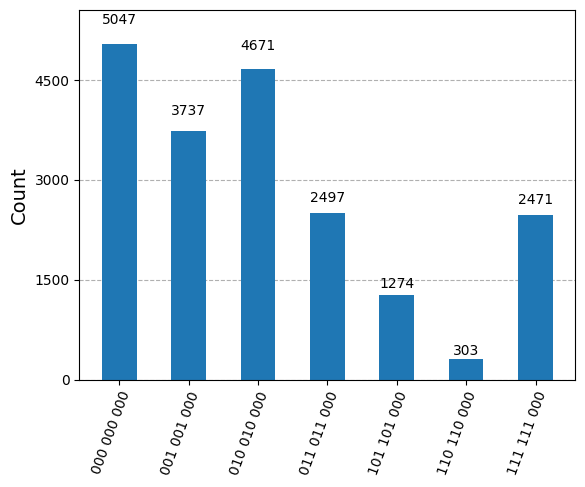

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

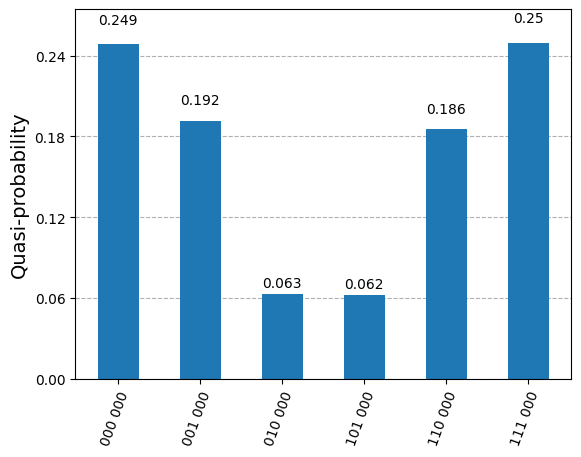

In [ ]:
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
# Convert the counts to a dictionary
counts_dict = dict(counts)

# Calculate the total counts
total = sum(counts_dict.values())

# Normalize the counts
normalized_counts  = {key: value/total for key, value in counts_dict.items()}

# Plot the histogram of the normalized counts
plot_histogram(normalized_counts)
# plt.show()

In [ ]:
from qiskit.quantum_info import Statevector

# Assuming qc is your quantum circuit
st = Statevector(qc)
density_matrix = st.to_operator()

# Optionally, you can print the density matrix
print(density_matrix)

QiskitError: 'Cannot apply instruction with classical bits: measure'

In [ ]:
# Remove measurements from the quantum circuit if they exist
qc.remove_final_measurements()

# Now you can create the Statevector
st = Statevector(qc)
density_matrix = st.to_operator()

# Optionally, you can print the density matrix
print(density_matrix)

Operator([[2.50000000e-01+0.j, 2.16506351e-01+0.j, 1.25000000e-01+0.j,
           4.17889456e-17+0.j, 3.71854204e-18+0.j, 1.25000000e-01+0.j,
           2.16506351e-01+0.j, 2.50000000e-01+0.j],
          [2.16506351e-01+0.j, 1.87500000e-01+0.j, 1.08253175e-01+0.j,
           3.61902884e-17+0.j, 3.22035187e-18+0.j, 1.08253175e-01+0.j,
           1.87500000e-01+0.j, 2.16506351e-01+0.j],
          [1.25000000e-01+0.j, 1.08253175e-01+0.j, 6.25000000e-02+0.j,
           2.08944728e-17+0.j, 1.85927102e-18+0.j, 6.25000000e-02+0.j,
           1.08253175e-01+0.j, 1.25000000e-01+0.j],
          [4.17889456e-17+0.j, 3.61902884e-17+0.j, 2.08944728e-17+0.j,
           6.98526388e-33+0.j, 6.21575803e-34+0.j, 2.08944728e-17+0.j,
           3.61902884e-17+0.j, 4.17889456e-17+0.j],
          [3.71854204e-18+0.j, 3.22035187e-18+0.j, 1.85927102e-18+0.j,
           6.21575803e-34+0.j, 5.53102195e-35+0.j, 1.85927102e-18+0.j,
           3.22035187e-18+0.j, 3.71854204e-18+0.j],
          [1.25000000e-01+0.j,

#NEQR ( Novel Enhanced  Quantum Representation)

In [ ]:
def decimal_to_binary(decimal_num):
  """Converts a decimal number to binary.

  Args:
    decimal_num: The decimal number to convert.

  Returns:
    The binary representation of the decimal number.
  """
  if decimal_num == 0:
    return "0b0"  # Special case for 0
  binary_num = bin(decimal_num)
  return binary_num

# Example usage
decimal_number = 255
binary_representation = decimal_to_binary(decimal_number)
print(f"The binary representation of {decimal_number} is {binary_representation}")  # Output: The binary representation of 10 is 0b1010

The binary representation of 255 is 0b11111111


In [ ]:
bin(255)

'0b11111111'

In [ ]:
# for i in range(0,256):
#   print(bin(i))

In [ ]:
""

In [ ]:
def decimal_to_8bit_binary(decimal_num):
  """Converts a decimal number to 8-digit binary.

  Args:
    decimal_num: The decimal number to convert.

  Returns:
    The 8-digit binary representation of the decimal number.
  """
  if decimal_num < 0 or decimal_num > 255:
    raise ValueError("Decimal number must be between 0 and 255 for 8-bit representation.")

  binary_num = bin(decimal_num)[2:]  # Remove '0b' prefix
  padded_binary = binary_num.zfill(8)  # Pad with leading zeros to 8 digits
  return padded_binary

# Example usage
decimal_number = 255
binary_representation = decimal_to_8bit_binary(decimal_number)
print(f"The 8-digit binary representation of {decimal_number} is {binary_representation}")  # Output: The 8-digit binary representation of 10 is 00001010

The 8-digit binary representation of 255 is 11111111


In [ ]:
for i in range(0,256):
  print(i,':',decimal_to_8bit_binary(i))

0 : 00000000
1 : 00000001
2 : 00000010
3 : 00000011
4 : 00000100
5 : 00000101
6 : 00000110
7 : 00000111
8 : 00001000
9 : 00001001
10 : 00001010
11 : 00001011
12 : 00001100
13 : 00001101
14 : 00001110
15 : 00001111
16 : 00010000
17 : 00010001
18 : 00010010
19 : 00010011
20 : 00010100
21 : 00010101
22 : 00010110
23 : 00010111
24 : 00011000
25 : 00011001
26 : 00011010
27 : 00011011
28 : 00011100
29 : 00011101
30 : 00011110
31 : 00011111
32 : 00100000
33 : 00100001
34 : 00100010
35 : 00100011
36 : 00100100
37 : 00100101
38 : 00100110
39 : 00100111
40 : 00101000
41 : 00101001
42 : 00101010
43 : 00101011
44 : 00101100
45 : 00101101
46 : 00101110
47 : 00101111
48 : 00110000
49 : 00110001
50 : 00110010
51 : 00110011
52 : 00110100
53 : 00110101
54 : 00110110
55 : 00110111
56 : 00111000
57 : 00111001
58 : 00111010
59 : 00111011
60 : 00111100
61 : 00111101
62 : 00111110
63 : 00111111
64 : 01000000
65 : 01000001
66 : 01000010
67 : 01000011
68 : 01000100
69 : 01000101
70 : 01000110
71 : 01000111
72

In [ ]:
qc1 = QuantumCircuit(2,2)
qc1.h(0)
qc1.h(1)
qc1.barrier()

qc2 = QuantumCircuit(8,8)
for i in range(0,8):
  qc2.h(i)



In [ ]:
x=int(input("pixel size:"))
print(x)
y=[]
for i in range(x):
  y.append(int(input("pixel value:")))

print(y)

pixel size:4
4
pixel value:0
pixel value:100
pixel value:200
pixel value:255
[0, 100, 200, 255]


In [ ]:
z=[]
for i in y:
  print(i,':',decimal_to_8bit_binary(i))
  z.append(decimal_to_8bit_binary(i))

print(z)

0 : 00000000
100 : 01100100
200 : 11001000
255 : 11111111
['00000000', '01100100', '11001000', '11111111']


In [ ]:
z[0][7]

'0'

In [ ]:
qc= QuantumCircuit(8,8)
for i in z:
  for j in range(8):
    if i[j]=='1':
      qc.x(j)

  qc.barrier()
  # qc.draw()
qc.draw()


░       ░ ┌───┐ ░ ┌───┐ ░ 
q_0: ─░───────░─┤ X ├─░─┤ X ├─░─
      ░ ┌───┐ ░ ├───┤ ░ ├───┤ ░ 
q_1: ─░─┤ X ├─░─┤ X ├─░─┤ X ├─░─
      ░ ├───┤ ░ └───┘ ░ ├───┤ ░ 
q_2: ─░─┤ X ├─░───────░─┤ X ├─░─
      ░ └───┘ ░       ░ ├───┤ ░ 
q_3: ─░───────░───────░─┤ X ├─░─
      ░       ░ ┌───┐ ░ ├───┤ ░ 
q_4: ─░───────░─┤ X ├─░─┤ X ├─░─
      ░ ┌───┐ ░ └───┘ ░ ├───┤ ░ 
q_5: ─░─┤ X ├─░───────░─┤ X ├─░─
      ░ └───┘ ░       ░ ├───┤ ░ 
q_6: ─░───────░───────░─┤ X ├─░─
      ░       ░       ░ ├───┤ ░ 
q_7: ─░───────░───────░─┤ X ├─░─
      ░       ░       ░ └───┘ ░ 
c: 8/═══════════════════════════

In [ ]:
st = Statevector(qc)
st.draw('latex')



<IPython.core.display.Latex object>

In [ ]:
qc= QuantumCircuit(10,10)
qc.h(8)
qc.h(9)
# qc.barrier()
# for i in z:
#   for j in range(8):
#     if i[j]=='1':
#       qc.mcx([8,9],j)

#   qc.barrier()
  # qc.draw()
qc.draw()


q_0: ─────
           
 q_1: ─────
           
 q_2: ─────
           
 q_3: ─────
           
 q_4: ─────
           
 q_5: ─────
           
 q_6: ─────
           
 q_7: ─────
      ┌───┐
 q_8: ┤ H ├
      ├───┤
 q_9: ┤ H ├
      └───┘
c: 10/═════

In [ ]:
st = Statevector(qc)
st.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
# !pip install qiskit

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

def neqr_encode(image_data):
    """
    Encodes classical image data into a quantum circuit using NEQR.

    Args:
        image_data (list): A 2D list representing the image pixel values.

    Returns:
        QuantumCircuit: The quantum circuit with the encoded image.
    """

    # Determine image dimensions
    height = len(image_data)
    width = len(image_data[0]) if height > 0 else 0  # Handle empty image

    # Calculate total number of qubits needed
    num_qubits = (height * width).bit_length()

    # Create quantum and classical registers
    qr = QuantumRegister(num_qubits, 'q')
    cr = ClassicalRegister(num_qubits, 'c')
    qc = QuantumCircuit(qr, cr)

    # Iterate through pixels and apply X gates based on pixel values
    for row in range(height):
        for col in range(width):
            pixel_value = image_data[row][col]

            # Convert pixel value to binary and apply X gates
            for i, bit in enumerate(bin(pixel_value)[2:].zfill(num_qubits)):
                if bit == '1':
                    qc.x(qr[i])

            # Entangle qubits to represent pixel position (optional)
            # ... (Implementation for entanglement) ...

    return qc


# Example usage:
# image_data = [[0, 1, 0],
#               [1, 0, 1],
#               [0, 1, 0]]

image_dat = [[0,100],
             [200,255]]
encoded_circuit = neqr_encode(image_data)
print(encoded_circuit.draw())

                         
q_0: ────────────────────
                         
q_1: ────────────────────
                         
q_2: ────────────────────
     ┌───┐┌───┐┌───┐┌───┐
q_3: ┤ X ├┤ X ├┤ X ├┤ X ├
     └───┘└───┘└───┘└───┘
c: 4/════════════════════
                         


In [ ]:
st = Statevector(encoded_circuit)
st.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble, execute
from qiskit.visualization import plot_histogram

ImportError: cannot import name 'execute' from 'qiskit' (/usr/local/lib/python3.10/dist-packages/qiskit/__init__.py)

In [ ]:


# NEQR model representation for 2^n x 2^n image with pixel values from 0 to 2^q
def neqr_generalized(image, n, q):
    # Calculate the total number of qubits required
    num_qubits = 2 * n + q  # 2n for row and column, q for pixel values
    qc = QuantumCircuit(num_qubits)

    # Loop over each pixel in the image (assuming 2^n x 2^n size)
    for i in range(image.shape[0]):  # Row index
        for j in range(image.shape[1]):  # Column index
            pixel_value = image[i][j]
            pixel_binary = np.binary_repr(pixel_value, width=q)  # Grayscale to binary

            # Encode row and column indices into quantum registers
            row_binary = np.binary_repr(i, width=n)
            col_binary = np.binary_repr(j, width=n)

            # Apply X gates to corresponding row qubits
            for k, bit in enumerate(row_binary):
                if bit == '1':
                    qc.x(k)  # Flip row qubits based on row index

            # Apply X gates to corresponding column qubits
            for k, bit in enumerate(col_binary):
                if bit == '1':
                    qc.x(n + k)  # Flip column qubits based on column index

            # Encode pixel value into the q qubits
            for k, bit in enumerate(pixel_binary):
                if bit == '1':
                    qc.x(2 * n + k)  # Flip pixel qubits based on intensity

    # Measure all qubits to read the state
    qc.measure_all()

    return qc

# Define image size parameters
n = 2  # For 2^n x 2^n image (e.g., n=2 for 4x4 image)
q = 4  # Pixel value range from 0 to 2^q (e.g., q=4 for values 0-15)

# Example 4x4 grayscale image with values from 0 to 15
image = np.array([[3, 12, 7, 8],
                  [14, 2, 10, 5],
                  [6, 9, 4, 15],
                  [0, 1, 13, 11]])

# Create the quantum circuit for NEQR representation
qc = neqr_generalized(image, n, q)

# # Simulate the quantum circuit
# simulator = Aer.get_backend('qasm_simulator')
# compiled_circuit = transpile(qc, simulator)
# qobj = assemble(compiled_circuit)
# result = execute(qc, simulator).result()

# # Plot result in histogram
# counts = result.get_counts(qc)
# plot_histogram(counts)


simulator = Aer.get_backend('qasm_simulator')
# Add measurements to the quantum circuit
qc.measure_all() # This adds measurements to all qubits in the circuit
job = simulator.run(qc, shots=20000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

{'00000000 00000000': 20000}
